# MUSA 650 Homework 1: Basics of Machine Learning

## 1. Data Exploration

In [37]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1.1 Dimensionality

**What is the type of the training and testing datasets?**

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

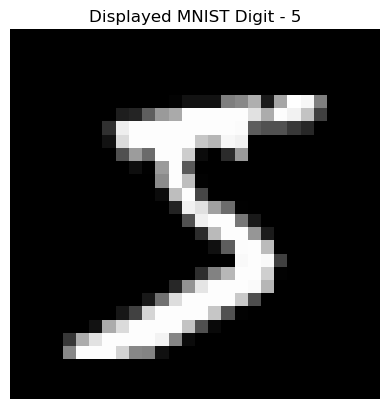

In [6]:
plt.imshow(x_train[0], cmap='gray')  
plt.title(f'Displayed MNIST Digit - {y_train[0]}')
plt.axis('off')  
plt.show()

The training and testing datasets are a widely-used test dataset containing grayscale hand-written digits, provided by the Keras library. I first read about the dataset in an [article identifying failure modes in GAN models](https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/). By showing the dataset, it seems like a 3D array, with many 2D arrays as its components. A closer inspection on its components shows that each 2D array represents a grayscale image of hand-written numbers: it consists of 28 columns, 28 rows, with each element in the array corresponds to the grayscale value of a pixel, ranging from 0 (black) to 255 (white).

**How many features are in the training dataset? The testing dataset? How many samples are in each dataset?**

In [7]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
print(len(x_train), len(x_test))

60000 10000


The test dataset, like the training dataset, contrains 28x28=784 features, as there are 784 different pixels in each image. The training dataset contains 60,000 samples, whereas the testing dataset contains 10,000 features.

**If an array has a shape of `(100, 28, 28)`, what does each number represent in the context of image data (i.e., which number represents the number of images, and which represent the number of pixels?), and how would it change if you flattened it to a 2D array?**

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train.reshape(60000, -1).shape

(60000, 784)

By testing on our dataset, we see that the first number represents the number of images, while the second and third numbers represent the two dimensions of images. By flattening each image in the array, the array becomes 2-dimensional. After flattening, the first number in the .shape attribute still represents the number of images, and the second number now represents the total number of pixels in each image, which is the product of the original image dimensions (height and width).

**How would you convert a 3D array into a 2D array without changing the total number of elements? Describe how `flatten()` and `reshape()` can be used for this purpose.**

In [11]:
x_train_new = []

for element in x_train:
    x_train_new.append(element.flatten())

np.array(x_train_new).shape

(60000, 784)

In [12]:
x_train.reshape(60000, -1).shape

(60000, 784)

The flatten() function is usually used to collapse the whole array into one dimension. Therefore, I can only think of writing a loop to convert a 3D array into a 2D array without changing total number of elements, where each elements in the original array is collapsed and stored in a new array. At the same time, the reshape() function can be used to reshape the original array in any desired forms. In this case, we set the first attribute 60,000 to make the new array to have the same number of elements as the original array, and the second attribute -1 to make the new shape compatible with the original shape.

**Explain why it’s necessary to reshape data when transitioning from raw images to model input, particularly in neural networks. What are the implications of reshaping an image array into a vector (1D array) for each sample? (Feel free to turn to Google for this, as long as you cite your sources.)**

From my understanding, in most cases we transform raw data due to model specifications. For example, when working with a GAN model, the discriminator works with a downsampled image to reduce computational complexity and better process hierarchical features, while the generator starts with a 1D vector to upsample into images. Therefore, people ususally write an automation process to reshape original images, so that they would be properly fed into discriminators. Possible implications of reshaping images into 1D arrays include: reduce memory taken in training ([source](https://www.geeksforgeeks.org/impact-of-image-flattening/)) and prepare data for the dense layers of the network ([source](https://medium.com/%40vaibhav1403/flattening-in-neural-network-10e260d2b06f)).

### 1.2 Visualization

**Select one random example from each category in the testing set, display each 2D image, and label it with the corresponding category name.**

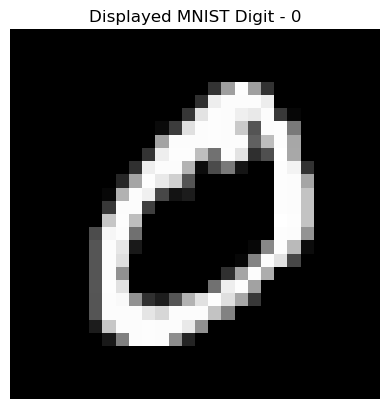

In [13]:
plt.imshow(x_train[1], cmap='gray')  
plt.title(f'Displayed MNIST Digit - {y_train[1]}')
plt.axis('off')  
plt.show()

## 2. Data Processing

### 2.1 Subsetting

**Create a 10% random subset of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?**

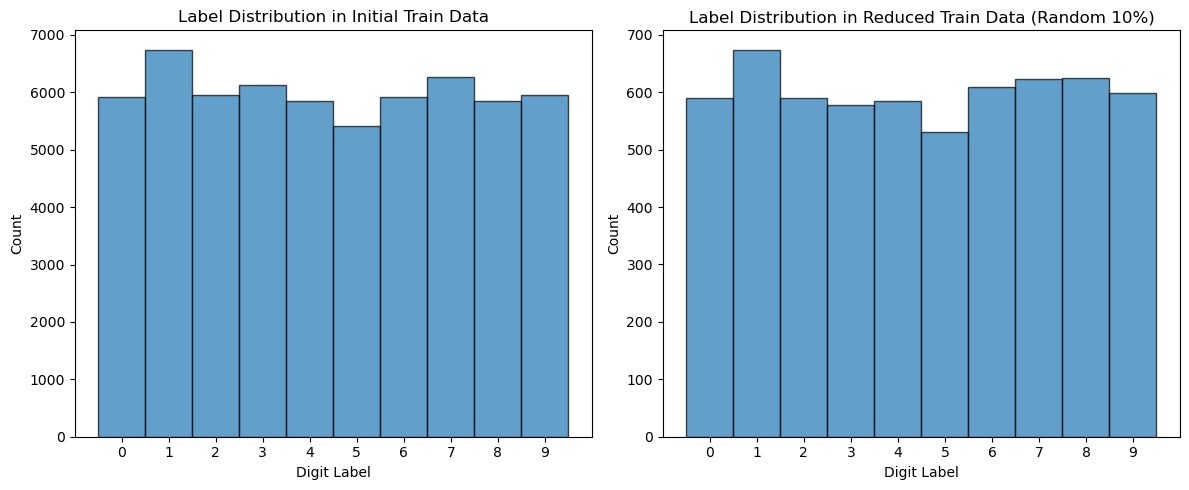

In [14]:
x_train_sub1, x_train_sub2, y_train_sub1, y_train_sub2 = train_test_split(
   x_train, y_train, test_size=0.9, random_state=42)

x_test_sub1, x_test_sub2, y_test_sub1, y_test_sub2 = train_test_split(
   x_test, y_test, test_size=0.9, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(y_train, bins=np.arange(11) - 0.5, alpha=0.7, edgecolor='black')
axes[0].set_title("Label Distribution in Initial Train Data")
axes[0].set_xlabel("Digit Label")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(10))

axes[1].hist(y_train_sub1, bins=np.arange(11) - 0.5, alpha=0.7, edgecolor='black')
axes[1].set_title("Label Distribution in Reduced Train Data (Random 10%)")
axes[1].set_xlabel("Digit Label")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(10))

plt.tight_layout()
plt.show()


From the histogram, it seems like that images with different labels has a roughly same share in the initial dataset, with images labeled "2" having the highest share, and images labeled with "5" having the lowest share. In the reduced dataset, the share percentages of different labeled images remain largely unchanged.

**Now subset the first 10% of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?**

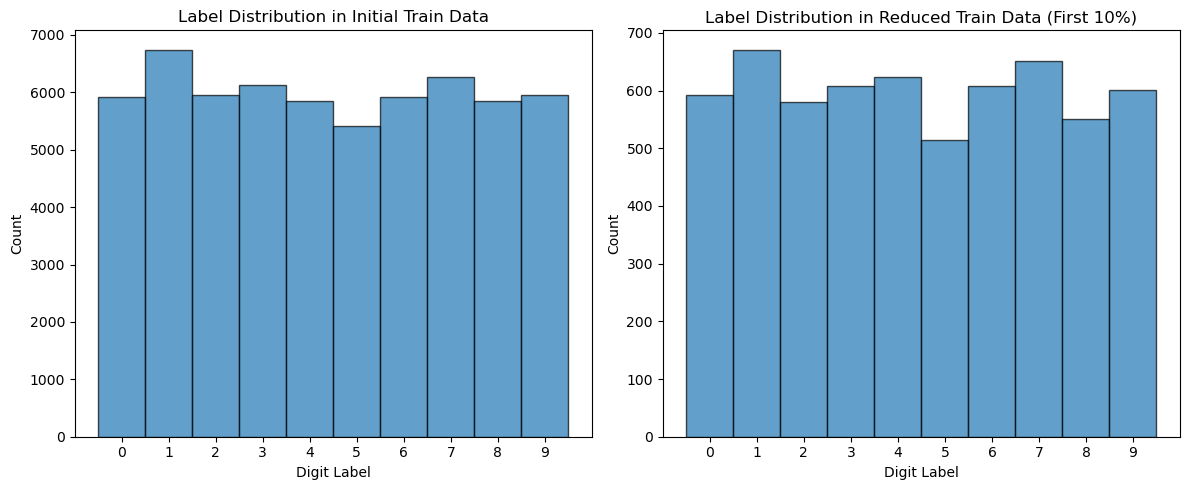

In [15]:
x_train_sub3, x_train_sub4, y_train_sub3, y_train_sub4 = train_test_split(
   x_train, y_train, test_size=0.9, shuffle=False)

x_test_sub3, x_test_sub4, y_test_sub3, y_test_sub4 = train_test_split(
   x_test, y_test, test_size=0.9, shuffle=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(y_train, bins=np.arange(11) - 0.5, alpha=0.7, edgecolor='black')
axes[0].set_title("Label Distribution in Initial Train Data")
axes[0].set_xlabel("Digit Label")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(10))

axes[1].hist(y_train_sub3, bins=np.arange(11) - 0.5, alpha=0.7, edgecolor='black')
axes[1].set_title("Label Distribution in Reduced Train Data (First 10%)")
axes[1].set_xlabel("Digit Label")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(10))

plt.tight_layout()
plt.show()

Subsetting the first 10% of images makes the distribution of labeled images in the reduced dataset deviate further away from the original distribution, with images labeled with "7" having a moderately higher percentage compared to the original dataset.

**When reducing dataset size, what differences might you expect to see in results between randomly selecting samples versus selecting the first portion of the dataset? Is this borne out by the subsets you just created? How does the distribution of the labels in the various subsampled datasets compare to the distribution of the full datasets?**

In expectation, the distribution of samples within a randomly selected sub-dataset retains a similar label distribution to the original dataset, while the distribution of samples within the first portion of dataset might drift further away from the original distribution, causing overrepresentation of some classes and underrepresentations of others. The label distribution in subsets echoes with this expectation. However, since the sampled dataset is large enough (6,000 samples), the distribution of labels still remain somewhat representative of the full dataset, preserving a reasonable level of diversity in the data.

**Why might subsampling a dataset be beneficial when developing machine learning models? Discuss the trade-offs.**

The main reason for subsampling training datasets is to improve model training speed and reduce computational costs. As machine learning model training usually takes a long time and a lot of gpu performance，training with a smaller dataset can effectively lead to faster training and saves computer memory. However, subsampling comes with potential trade-offs, including lost of data diversity, underfitting and limited model accuracy.

### 2.2 Feature Engineering

**What are the features versus the output in this assignment? Why is it important to distinguish between features (inputs) and outputs (labels) in a machine learning model?**

In machine learning, input variables (also called features or predictors) are the characteristics or attributes of the data that are used to make predictions or take actions. The output variable (also called the target or label) is the desired outcome or prediction that the model is trained to produce. ([source](https://www.sparkcodehub.com/machine-learning-input-and-output-variables)) In this assignment, input features are images of hand-written digits from 0-9, while outputs are digit categories associated with the images. It is important to distinguish between features and outputs because defining the learning objective will help to establish the data processing routine and model architecture.

**Select all train images labeled "3". Create a single, pixel-wise average image of all of these images. Plot the 2D mean and standard deviation images for category 3 in both the training and testing sets. Comment on the differences between the mean and standard deviation images between the training and testing datasets. Plot the 2D mean and standard deviation images for category "3" in the training and testing sets for the binarized images.**

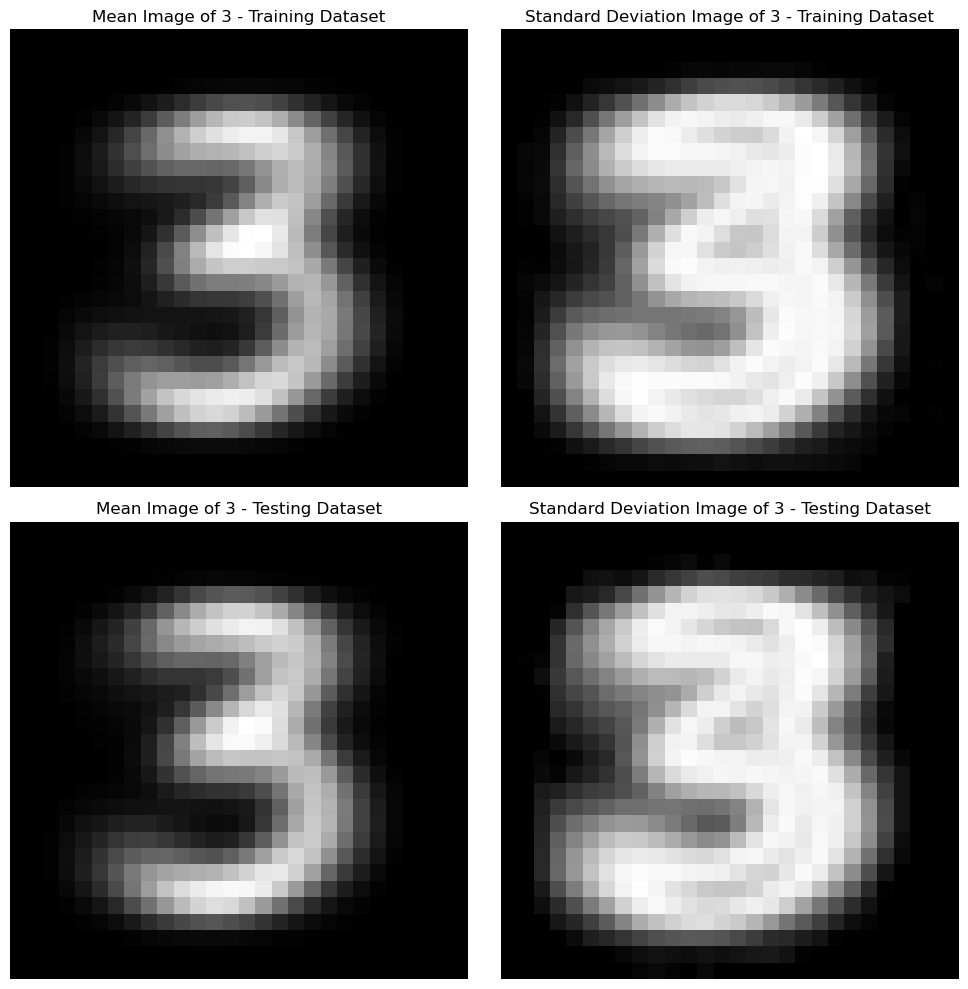

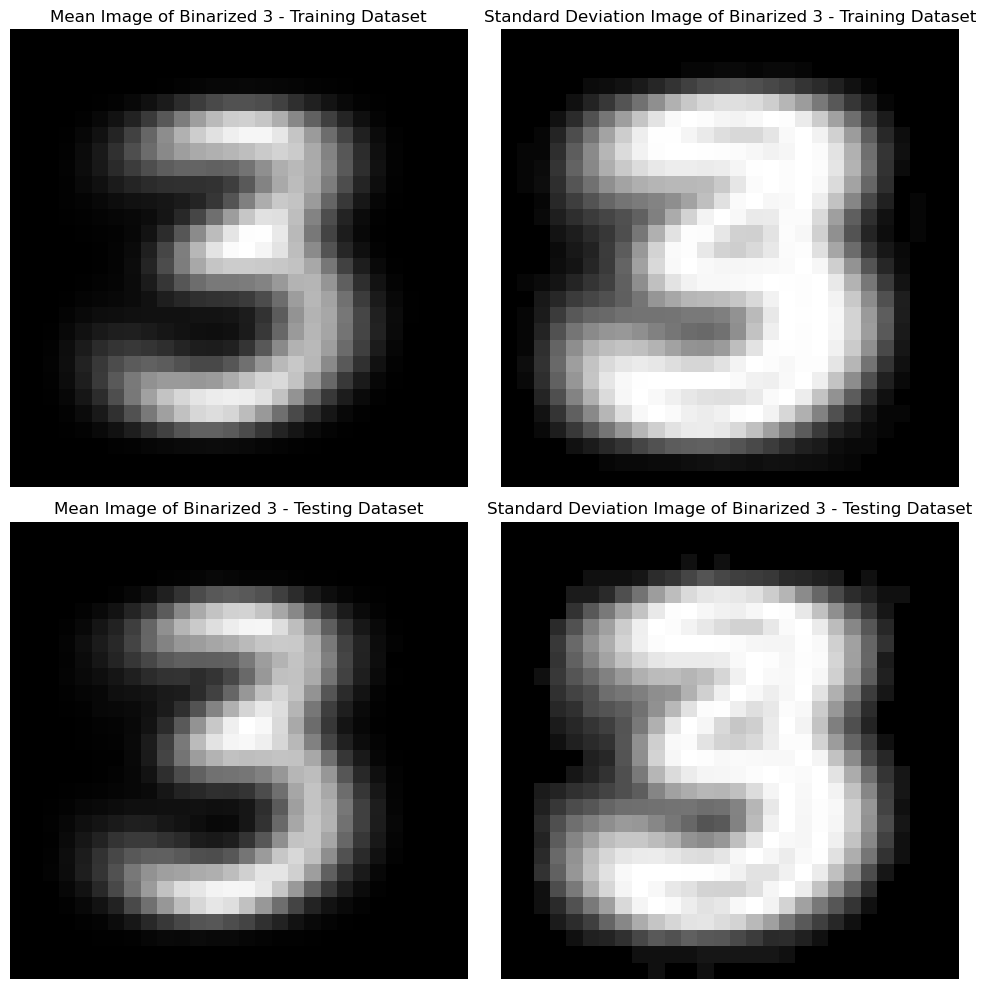

In [16]:
x_train_3 = x_train[y_train == 3]
x_test_3 = x_test[y_test == 3]

mean_train_3 = np.mean(x_train_3, axis=0)
std_train_3 = np.std(x_train_3, axis=0)

mean_test_3 = np.mean(x_test_3, axis=0)
std_test_3 = np.std(x_test_3, axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(mean_train_3, cmap='gray')
axes[0, 0].set_title("Mean Image of 3 - Training Dataset")
axes[0, 0].axis("off")

axes[0, 1].imshow(std_train_3, cmap='gray')
axes[0, 1].set_title("Standard Deviation Image of 3 - Training Dataset")
axes[0, 1].axis("off")

axes[1, 0].imshow(mean_test_3, cmap='gray')
axes[1, 0].set_title("Mean Image of 3 - Testing Dataset")
axes[1, 0].axis("off")

axes[1, 1].imshow(std_test_3, cmap='gray')
axes[1, 1].set_title("Standard Deviation Image of 3 - Testing Dataset")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

b_train_3 = (x_train_3 > 128).astype(int)
b_test_3 = (x_test_3 > 128).astype(int)

mean_b_train_3 = np.mean(b_train_3, axis=0)
std_b_train_3 = np.std(b_train_3, axis=0)

mean_b_test_3 = np.mean(b_test_3, axis=0)
std_b_test_3 = np.std(b_test_3, axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(mean_b_train_3, cmap='gray')
axes[0, 0].set_title("Mean Image of Binarized 3 - Training Dataset")
axes[0, 0].axis("off")

axes[0, 1].imshow(std_b_train_3, cmap='gray')
axes[0, 1].set_title("Standard Deviation Image of Binarized 3 - Training Dataset")
axes[0, 1].axis("off")

axes[1, 0].imshow(mean_b_test_3, cmap='gray')
axes[1, 0].set_title("Mean Image of Binarized 3 - Testing Dataset")
axes[1, 0].axis("off")

axes[1, 1].imshow(std_b_test_3, cmap='gray')
axes[1, 1].set_title("Standard Deviation Image of Binarized 3 - Testing Dataset")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

The mean and standard deviation images from training and testing dataset do not seem to have a large difference, possibly due to the large sample size. Theoretically, images from a larger dataset (training dataset in this case) are expected to have a larger area of prominent standard deviation, reflecting greater variation in handwritten styles. Additionally, the mean image from a larger dataset may appear slightly more blurred due to the averaging of a higher number of diverse samples.

**Now repeat this for a new label (e.g., "7"). Comment on the differences between the mean and standard deviation images between the training and testing datasets for the binarized images.**

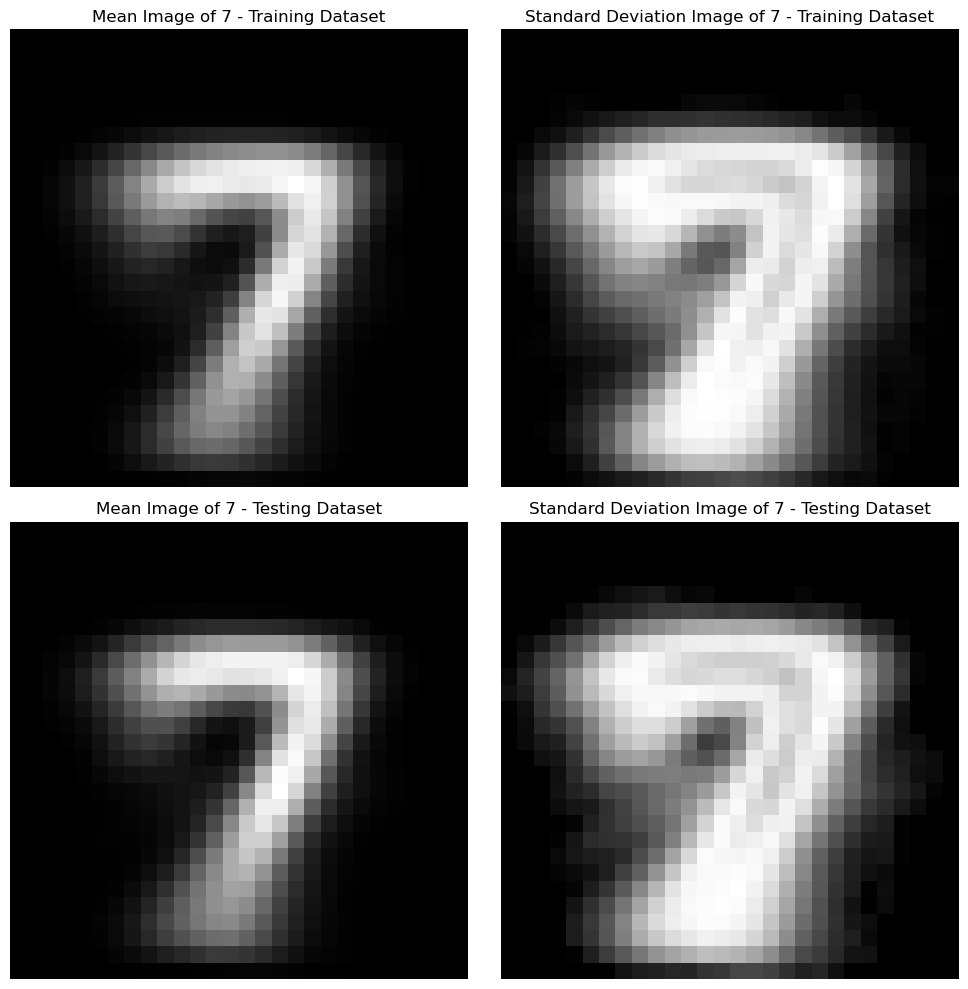

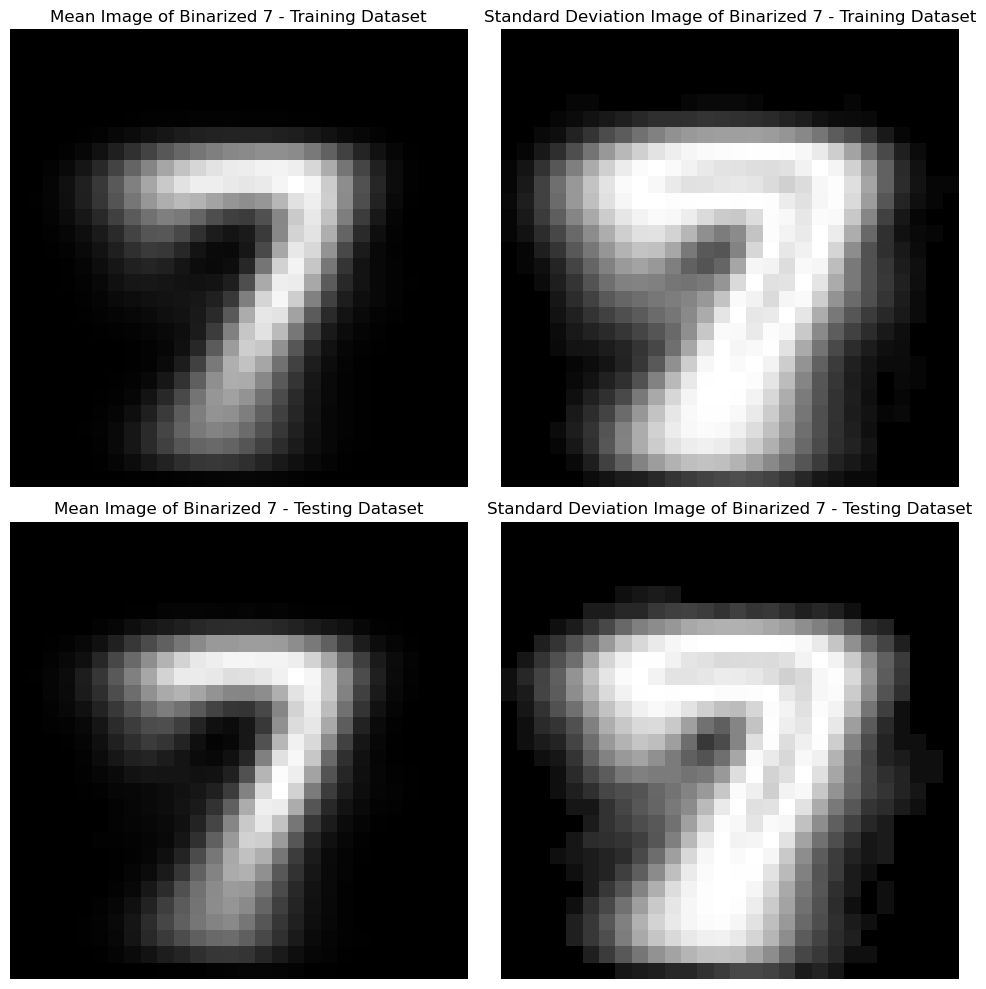

In [17]:
x_train_7 = x_train[y_train == 7]
x_test_7 = x_test[y_test == 7]

mean_train_7 = np.mean(x_train_7, axis=0)
std_train_7 = np.std(x_train_7, axis=0)

mean_test_7 = np.mean(x_test_7, axis=0)
std_test_7 = np.std(x_test_7, axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(mean_train_7, cmap='gray')
axes[0, 0].set_title("Mean Image of 7 - Training Dataset")
axes[0, 0].axis("off")

axes[0, 1].imshow(std_train_7, cmap='gray')
axes[0, 1].set_title("Standard Deviation Image of 7 - Training Dataset")
axes[0, 1].axis("off")

axes[1, 0].imshow(mean_test_7, cmap='gray')
axes[1, 0].set_title("Mean Image of 7 - Testing Dataset")
axes[1, 0].axis("off")

axes[1, 1].imshow(std_test_7, cmap='gray')
axes[1, 1].set_title("Standard Deviation Image of 7 - Testing Dataset")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

b_train_7 = (x_train_7 > 128).astype(int)
b_test_7 = (x_test_7 > 128).astype(int)

mean_b_train_7 = np.mean(b_train_7, axis=0)
std_b_train_7 = np.std(b_train_7, axis=0)

mean_b_test_7 = np.mean(b_test_7, axis=0)
std_b_test_7 = np.std(b_test_7, axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(mean_b_train_7, cmap='gray')
axes[0, 0].set_title("Mean Image of Binarized 7 - Training Dataset")
axes[0, 0].axis("off")

axes[0, 1].imshow(std_b_train_7, cmap='gray')
axes[0, 1].set_title("Standard Deviation Image of Binarized 7 - Training Dataset")
axes[0, 1].axis("off")

axes[1, 0].imshow(mean_b_test_7, cmap='gray')
axes[1, 0].set_title("Mean Image of Binarized 7 - Testing Dataset")
axes[1, 0].axis("off")

axes[1, 1].imshow(std_b_test_7, cmap='gray')
axes[1, 1].set_title("Standard Deviation Image of Binarized 7 - Testing Dataset")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

Like in non-binarized images, mean images from a smaller dataset (testing dataset in this case) are expected to have a sharper shape, while standard deviation images are expected to be found with a larger bright region. Tests with images labeled "7" returned results that align with expectations.

**Binarize both of the images from the previous question by setting pixel values equal to 1 if they are greater than the mean value for that pixel and equal to 0 if they are less than the mean value for that pixel.**

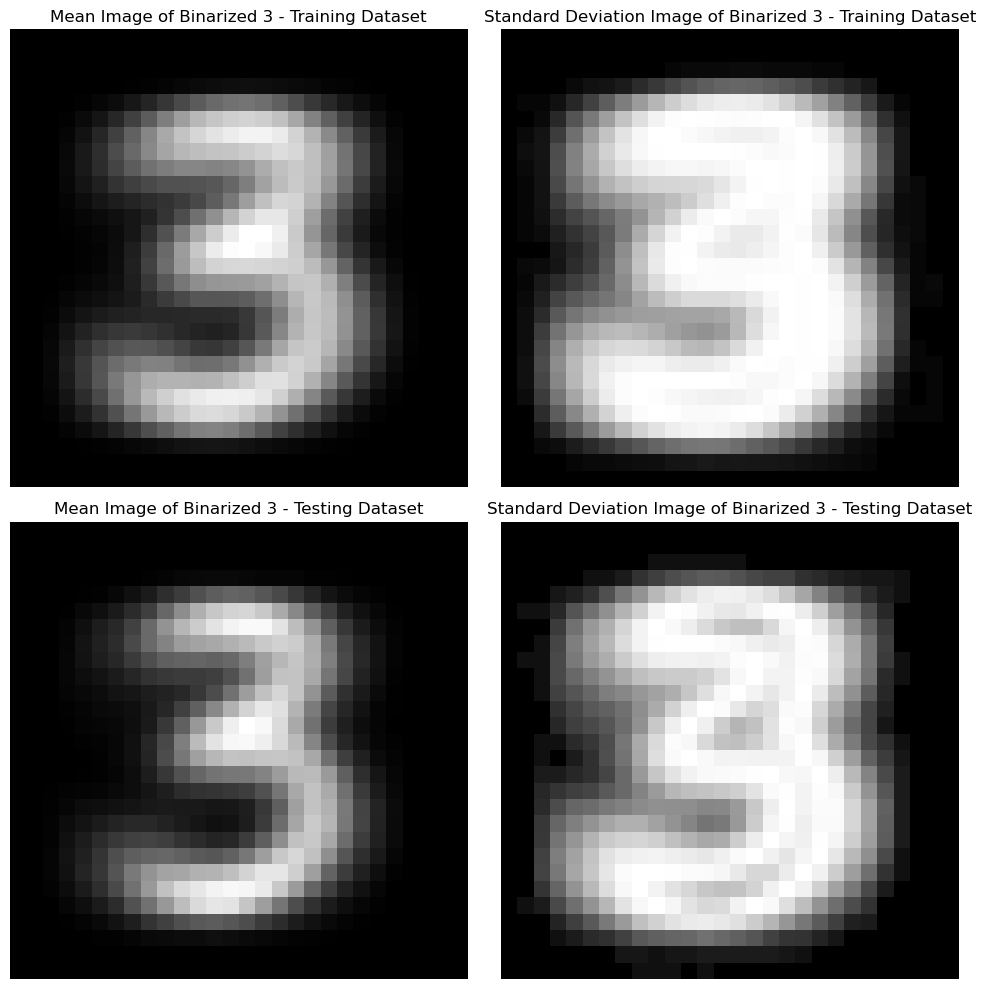

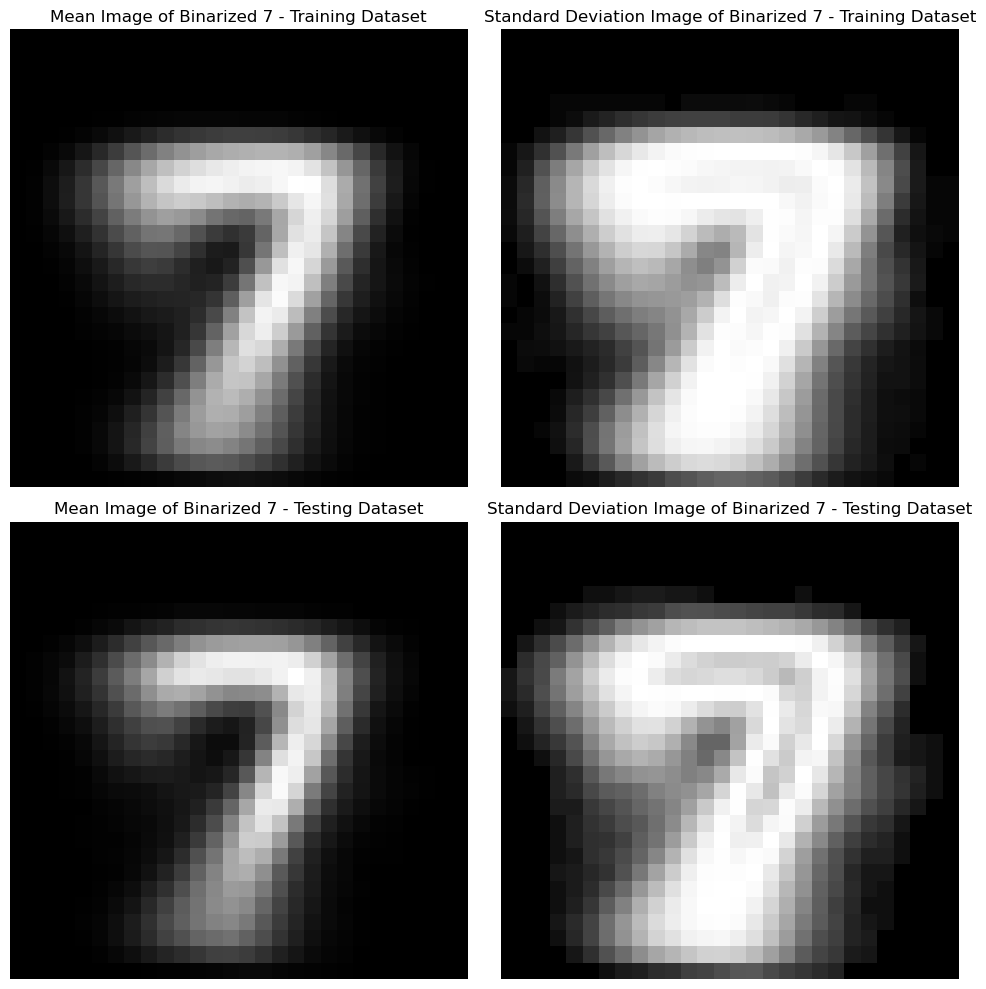

In [18]:
b_train_3_new = (x_train_3 > mean_train_3).astype(int)
b_test_3_new = (x_test_3 > std_train_3).astype(int)

mean_b_train_3_new = np.mean(b_train_3_new, axis=0)
std_b_train_3_new = np.std(b_train_3_new, axis=0)

mean_b_test_3_new = np.mean(b_test_3_new, axis=0)
std_b_test_3_new = np.std(b_test_3_new, axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(mean_b_train_3_new, cmap='gray')
axes[0, 0].set_title("Mean Image of Binarized 3 - Training Dataset")
axes[0, 0].axis("off")

axes[0, 1].imshow(std_b_train_3_new, cmap='gray')
axes[0, 1].set_title("Standard Deviation Image of Binarized 3 - Training Dataset")
axes[0, 1].axis("off")

axes[1, 0].imshow(mean_b_test_3_new, cmap='gray')
axes[1, 0].set_title("Mean Image of Binarized 3 - Testing Dataset")
axes[1, 0].axis("off")

axes[1, 1].imshow(std_b_test_3_new, cmap='gray')
axes[1, 1].set_title("Standard Deviation Image of Binarized 3 - Testing Dataset")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

b_train_7_new = (x_train_7 > mean_train_7).astype(int)
b_test_7_new = (x_test_7 > std_train_7).astype(int)

mean_b_train_7_new = np.mean(b_train_7_new, axis=0)
std_b_train_7_new = np.std(b_train_7_new, axis=0)

mean_b_test_7_new = np.mean(b_test_7_new, axis=0)
std_b_test_7_new = np.std(b_test_7_new, axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(mean_b_train_7_new, cmap='gray')
axes[0, 0].set_title("Mean Image of Binarized 7 - Training Dataset")
axes[0, 0].axis("off")

axes[0, 1].imshow(std_b_train_7_new, cmap='gray')
axes[0, 1].set_title("Standard Deviation Image of Binarized 7 - Training Dataset")
axes[0, 1].axis("off")

axes[1, 0].imshow(mean_b_test_7_new, cmap='gray')
axes[1, 0].set_title("Mean Image of Binarized 7 - Testing Dataset")
axes[1, 0].axis("off")

axes[1, 1].imshow(std_b_test_7_new, cmap='gray')
axes[1, 1].set_title("Standard Deviation Image of Binarized 7 - Testing Dataset")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

**In plain English, what are we actually doing when we binarize an image? How does the new pixel value relate to the pixel value of the original image and the mean value for that pixel across all images with that label?**

In the second method, the new pixel value is established by comparing the original pixel value and mean pixel value - if original pixel value is higher than mean pixel value, then the new pixel value is labeled as 1; otherwise it is labeled as 0.

**What is the index of the most dissimilar image in category "3" in the training set for the regular images? What about the most **similar** image? Does this change for the binarized images? If so, why? Make sure to plot all four images with approproate labels.**

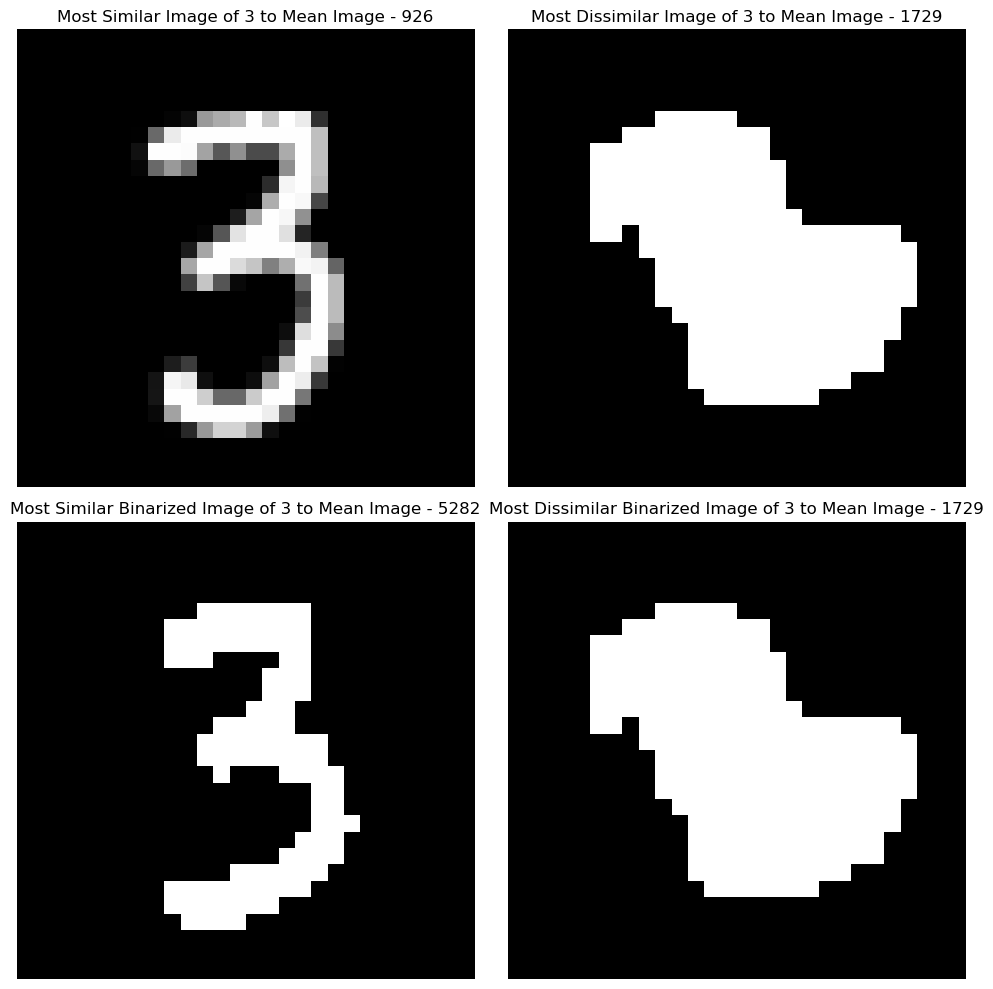

In [19]:
distances = pairwise_distances(x_train_3.reshape(len(x_train_3), -1), mean_train_3.reshape(1, -1))

similar_index = np.argmin(distances)
dissimilar_index = np.argmax(distances)

similar_image = x_train_3[similar_index]
dissimilar_image = x_train_3[dissimilar_index]

b_distances = pairwise_distances(b_train_3.reshape(len(b_train_3), -1), mean_b_train_3.reshape(1, -1))

similar_b_index = np.argmin(b_distances)
dissimilar_b_index = np.argmax(b_distances)

similar_b_image = b_train_3[similar_b_index]
dissimilar_b_image = b_train_3[dissimilar_b_index]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(similar_image, cmap='gray')
axes[0, 0].set_title(f"Most Similar Image of 3 to Mean Image - {similar_index}")
axes[0, 0].axis("off")

axes[0, 1].imshow(dissimilar_image, cmap='gray')
axes[0, 1].set_title(f"Most Dissimilar Image of 3 to Mean Image - {dissimilar_index}")
axes[0, 1].axis("off")

axes[1, 0].imshow(similar_b_image, cmap='gray')
axes[1, 0].set_title(f"Most Similar Binarized Image of 3 to Mean Image - {similar_b_index}")
axes[1, 0].axis("off")

axes[1, 1].imshow(dissimilar_b_image, cmap='gray')
axes[1, 1].set_title(f"Most Dissimilar Binarized Image of 3 to Mean Image - {dissimilar_b_index}")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


The index of "most similar image" changes between normal images and binarized images, possibly owing to the fact that binarization changes pixel values from "middle values" to binary values. This transformation alters the overall pixel distribution, causing the original most similar image to no longer be the closest match to the mean binarized image. On the other hand, the most dissimilar image didn't change before and after binarization, due to it being an extreme outlier.

**What do you think the effect of binarizing these images is from a machine learning perspective? How does binarization of images (converting pixel values to 0 or 1 based on a threshold) affect the representation of features, and what might be the benefits and limitations of this approach?**

Binarizing training images make all pixel values either 0 or 1, which would help simplify feature complexity while preserving the basic structure of the hand-written digits. This reduction in complexity can make feature extraction and model training more efficient. However, binarization also results in the loss of finer details, such as stroke thickness and brush pressure, which may carry useful information for distinguishing similar digits. Thus, while binarization helps fasten the learning process, it also comes with the trade-off of potentially discarding valuable information.

**How does what you've just done relate to the idea of standardizing data? Why might it be important to standardize our data before using it to train a model?**

Converting all pixel values to either 0 or 1 help us to scale all image arrays to a same value range ({0, 1}), which is similar to the process of standarization. Standarizing the data could potentially contribute to better model learning performance, by avoiding it giving too much weight to pixels that generally have higher values - ensuring that each pixel contributes equally to the learning process.

**Describe how calculating a pixel-wise mean or standard deviation for a set of images can help you understand variations within a category. What does a high standard deviation indicate in this context?**

The mean image represents the average shape and structure of the digit in the dataset. Brighter regions indicate pixels that are consistently activated, while darker or faded regions suggest areas where there is less certainty about the pixel being part of the digit. On the other hand, the standard deviation image highlights where and how much variation exists across different samples. Brighter regions indicate pixel-wise inconsistencies across different handwritten samples, while darker regions suggest pixels with strongly consistent features, meaning most samples have similar pixel values at those locations. A high standard deviation indicate that among the digits written, many of them might be positioned differently, or exhibit different writing habits in strokes.

## 3. Model Training, Validation, and Intepretation

### 3.1 Support Vector Machine

**From the training dataset, select only images from categories "3" and "9".Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9.**

In [20]:
x_train_39 = x_train[(y_train == 3) | (y_train == 9)]
x_train_39 = x_train_39.reshape(len(x_train_39), -1)

y_train_39 = y_train[(y_train == 3) | (y_train == 9)]

y_train_39 = np.where(y_train_39 == 3, 0, 1)

x_Set1, x_Set2, y_Set1, y_Set2 = train_test_split(x_train_39, y_train_39, test_size=0.4, random_state=42)

**Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2. What is the prediction accuracy using the model trained on the training set? What is the prediction accuracy using the model trained on the testing set?**

In [21]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_Set1, y_Set1)

y_pred_Set2 = svm_model.predict(x_Set2)

accuracy_Set2 = accuracy_score(y_Set2, y_pred_Set2)

y_pred_Set1 = svm_model.predict(x_Set1)
accuracy_Set1 = accuracy_score(y_Set1, y_pred_Set1)

print(f"The prediction accuracy on the training set is {round(accuracy_Set1 * 100, 2)}%, the prediction accuracy on the testing set is {round(accuracy_Set2 * 100, 2)}%.")

The prediction accuracy on the training set is 100.0%, the prediction accuracy on the testing set is 97.43%.


### 3.2 Modeling with Engineered Data

We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:

- Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.
- For each image row i, find n_i, the sum of 1's in the row (28 features).
- For each image column j, find n_j, the sum of 1's in the column (28 features).
- Concatenate these features to form a feature vector of 56 features.

**What is the prediction accuracy using an SVM model trained on the training set? What is the prediction accuracy using an SVM model trained on the testing set? How about the prediction accuracy of a KNN model trained on the training set? And on the testing set? What does this tell you about the potential impacts of feature engineering?**

In [29]:
x_train_39 = x_train[(y_train == 3) | (y_train == 9)]
b_x_train_39 = (x_train_39 > 128).astype(int)

row_sums = np.sum(b_x_train_39, axis=2) 
col_sums = np.sum(b_x_train_39, axis=1)

x_train_39_features = np.hstack([row_sums, col_sums])

x_Set1_new, x_Set2_new, y_Set1_new, y_Set2_new = train_test_split(x_train_39_features, y_train_39, test_size=0.4, random_state=42)

svm_model_2= SVC(kernel='linear', random_state=42)
svm_model_2.fit(x_Set1_new, y_Set1_new)

y_pred_svm_Set2 = svm_model_2.predict(x_Set2_new)
accuracy_svm_Set2 = accuracy_score(y_Set2_new, y_pred_svm_Set2)

y_pred_svm_Set1 = svm_model_2.predict(x_Set1_new)
accuracy_svm_Set1 = accuracy_score(y_Set1_new, y_pred_svm_Set1)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_Set1_new, y_Set1_new)

y_pred_knn_Set2 = knn_model.predict(x_Set2_new)
accuracy_knn_Set2 = accuracy_score(y_Set2_new, y_pred_knn_Set2)

y_pred_knn_Set1 = knn_model.predict(x_Set1_new)
accuracy_knn_Set1 = accuracy_score(y_Set1_new, y_pred_knn_Set1)

print(f"The prediction accuracy of SVM model on the training set is {round(accuracy_svm_Set1 * 100, 2)}%, the prediction accuracy of SVM model on the testing set is {round(accuracy_svm_Set2 * 100, 2)}%.")
print(f"The prediction accuracy of KNN model on the training set is {round(accuracy_knn_Set1 * 100, 2)}%, the prediction accuracy of KNN model on the testing set is {round(accuracy_knn_Set2 * 100, 2)}%.")

The prediction accuracy of SVM model on the training set is 96.9%, the prediction accuracy of SVM model on the testing set is 96.46%.
The prediction accuracy of KNN model on the training set is 98.01%, the prediction accuracy of KNN model on the testing set is 96.9%.


The results suggest that feature engineering helps minimize overfitting, as prediction accuracy on training set is no longer 100%. Comparing between two models, the k-NN model is performing slightly better on this dataset, achieving slightly higher prediction accuracy on both training and testing datasets.

### 3.3 K-Nearest Neighbors

In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9. Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.

**For k = 4, what is the label that was predicted with lowest accuracy?**

In [51]:
x_train_odd = x_train[(y_train == 1) | (y_train == 3) | (y_train == 5) | (y_train == 7) | (y_train == 9)]
y_train_odd = y_train[(y_train == 1) | (y_train == 3) | (y_train == 5) | (y_train == 7) | (y_train == 9)]

accuracy = {}
confusion_matrices = {}

for nn in range(4, 40, 4):
    knn_model = KNeighborsClassifier(n_neighbors=nn)
    knn_model.fit(x_train_odd.reshape(len(x_train_odd), -1), y_train_odd)

    y_pred_odd = knn_model.predict(x_train_odd.reshape(len(x_train_odd), -1))

    conf_matrix = confusion_matrix(y_train_odd, y_pred_odd)
    confusion_matrices[nn] = conf_matrix

    accuracy[nn] = {}
    
    for label in [1, 3, 5, 7, 9]:
        x_train_odd_label = x_train_odd[y_train_odd == label].reshape(sum(y_train_odd == label), -1)
        y_train_odd_label = y_train_odd[y_train_odd == label]

        y_pred_odd_label = knn_model.predict(x_train_odd_label)

        accuracy[nn][label] = accuracy_score(y_train_odd_label, y_pred_odd_label)
        print("·")

·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·
·


In [39]:
low_acc_label = min(accuracy[4], key=accuracy[4].get)
print(f"For k = 4，label {low_acc_label} was predicted with lowest accuracy.")

For k = 4，label 9 was predicted with lowest accuracy.


**For k = 20, what is the label that was predicted with lowest accuracy?**

In [40]:
low_acc_label_20 = min(accuracy[20], key=accuracy[20].get)
print(f"For k = 20，label {low_acc_label_20} was predicted with lowest accuracy.")

For k = 20，label 9 was predicted with lowest accuracy.


**What is the label pair that was confused most often (i.e., class A is labeled as B, and vice versa)?**

In [49]:
confused_pairs = {}
labels = [1, 3, 5, 7, 9]

for nn, conf_matrix in confusion_matrices.items():
    np.fill_diagonal(conf_matrix, 0)  

    confused_pair = np.unravel_index(np.argmax(conf_matrix), conf_matrix.shape)

    confused_labels = (labels[max_confused_pair[0]], labels[max_confused_pair[1]])
    confused_pairs[nn] = (confused_labels, conf_matrix[confused_pair])

    print(f"In {nn}-NN model, the label pair that was confused most often is {confused_pairs[nn][0]}, by {confused_pairs[nn][1]} times.")

In 4-NN model, the label pair that was confused most often is (9, 7), by 64 times.
In 8-NN model, the label pair that was confused most often is (9, 7), by 67 times.
In 12-NN model, the label pair that was confused most often is (9, 7), by 77 times.
In 16-NN model, the label pair that was confused most often is (9, 7), by 85 times.
In 20-NN model, the label pair that was confused most often is (9, 7), by 84 times.
In 24-NN model, the label pair that was confused most often is (9, 7), by 94 times.
In 28-NN model, the label pair that was confused most often is (9, 7), by 103 times.
In 32-NN model, the label pair that was confused most often is (9, 7), by 104 times.
In 36-NN model, the label pair that was confused most often is (9, 7), by 109 times.


**Visualize 5 mislabeled samples with their actual and predicted labels.**

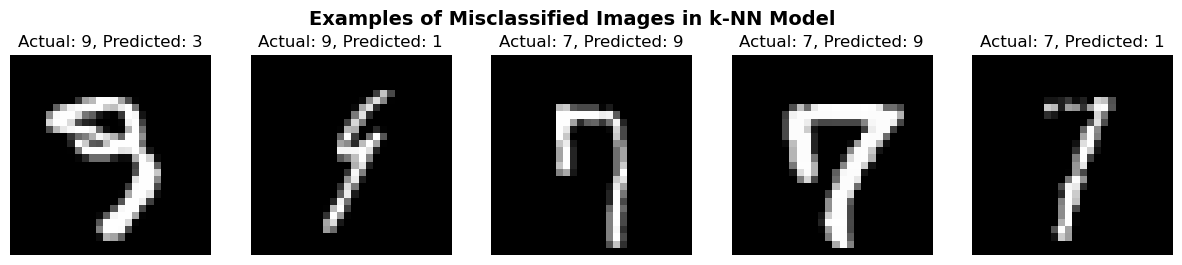

In [56]:
misclass_index = np.where(y_train_odd != y_pred_odd)[0]
  
selected_index = np.random.choice(misclass_index, 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, idx in enumerate(selected_index):
    axes[i].imshow(x_train_odd[idx].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Actual: {y_train_odd[idx]}, Predicted: {y_pred_odd[idx]}", fontsize=12)
    axes[i].axis('off')


plt.suptitle("Examples of Misclassified Images in k-NN Model", fontsize=14, fontweight='bold')
plt.show()

**Based on the patterns in the pixel values for each category, which labels (numbers) do you think the model might struggle to identify or distinguish from one another? Explain why certain labels might be more challenging to separate, considering the similarity in pixel patterns or shapes.**

Based on hand-written digit patterns, 9 and 7 might be difficult to distiguish from one another, primarily due to two factors: their similar overall structure and the significant pixel overlap in high-value regions. These similarities make it challenging for machine learning models to accurately differentiate between them.

### 3.4 Comprehension Questions

**Why is it important to have separate training and testing datasets? What potential issues arise if you use the same data for both training and evaluation?**

It is important to have separate training and testing datasets to ensure that a machine learning model generalizes well to unseen data. If a model is trained and tested on the same dataset, it may simply memorize the data and its corresponding outputs, leading to overfitting. This means that while the model may perform well on the training data, its performance on new, unseen data could be poor, resulting in low predictive accuracy when applied to real-world scenarios.

**If you achieve a high accuracy on the training set but a lower accuracy on the testing set, what might this indicate about your model’s performance and generalization?**

If we achieve high accuracy on the training set but a lower accuracy on the testing set, it likely indicates overfitting. This means the model has learned patterns too specific to the training data, including noise and irrelevant details, instead of capturing generalizable features.